In [1]:
# Let's load the provided dataset and inspect its structure, size, and basic statistics.
import pandas as pd

# Load the dataset
file_path = 'data2024b.csv'
data = pd.read_csv(file_path)

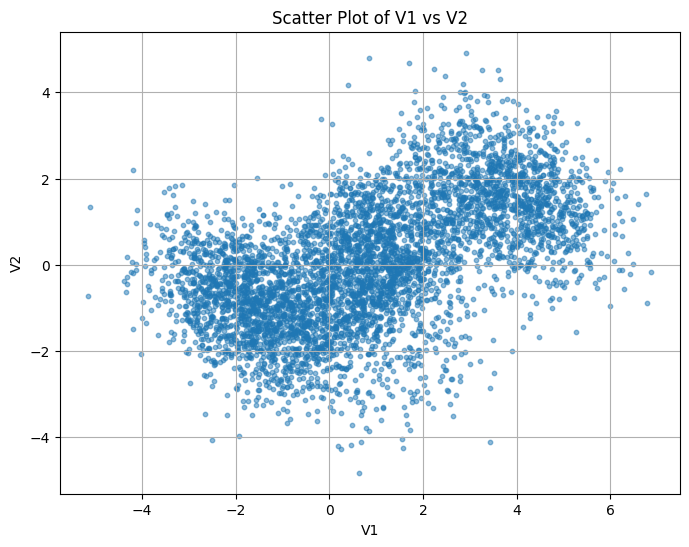

In [23]:
import matplotlib.pyplot as plt

# Scatter plot to visualize V1 vs. V2
plt.figure(figsize=(8, 6))
plt.scatter(data['V1'], data['V2'], alpha=0.5, s=10)
plt.title('Scatter Plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.grid(True)
plt.show()


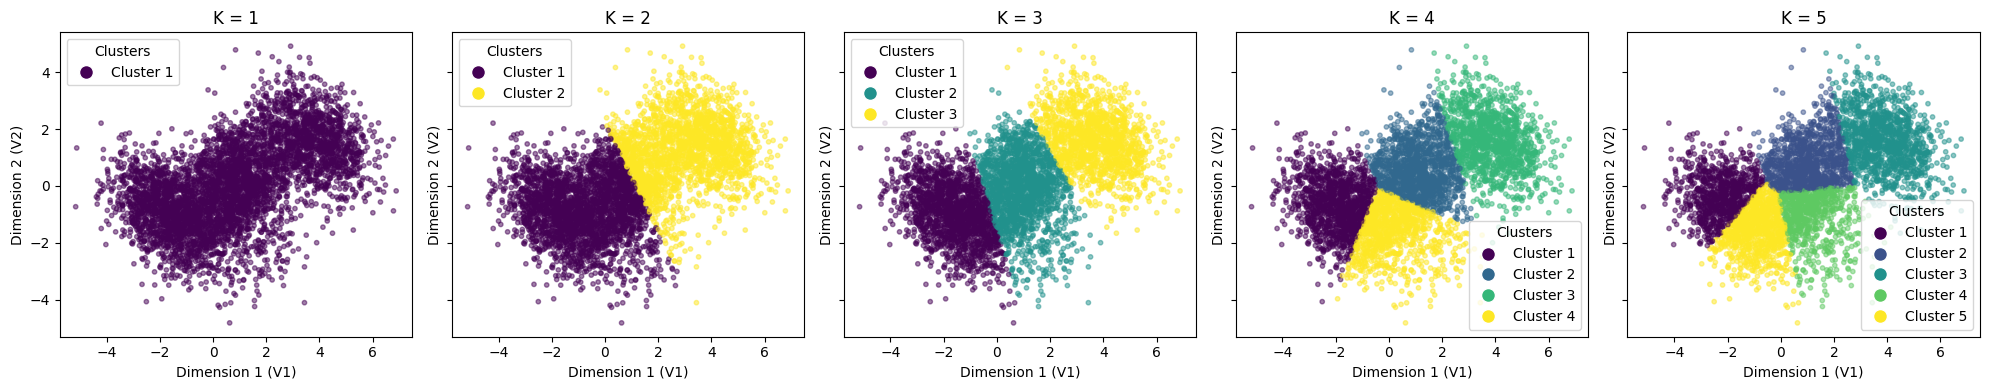

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the 2D data from the dataset (V1 and V2 columns)
observations = data[['V1', 'V2']].values

# Define a range of K values
K_values = range(1, 6)

# Choose which dimensions to plot (e.g., dimensions 0 and 1, which correspond to V1 and V2)
dim1, dim2 = 0, 1

# Create subplots for each K value
fig, axs = plt.subplots(1, len(K_values), figsize=(20, 4), sharey=True)

# Perform K-means clustering for each K and plot
for idx, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(observations)  # Predict cluster labels for the original data
    
    ax = axs[idx]
    scatter = ax.scatter(observations[:, dim1], observations[:, dim2], c=labels, cmap='viridis', marker='o', alpha=0.5, s=10)
    ax.set_title(f'K = {K}')
    ax.set_xlabel(f'Dimension {dim1 + 1} (V1)')
    ax.set_ylabel(f'Dimension {dim2 + 1} (V2)')
    
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(K)]
    ax.legend(handles, [f'Cluster {i+1}' for i in range(K)], title="Clusters")

plt.tight_layout()
plt.show()


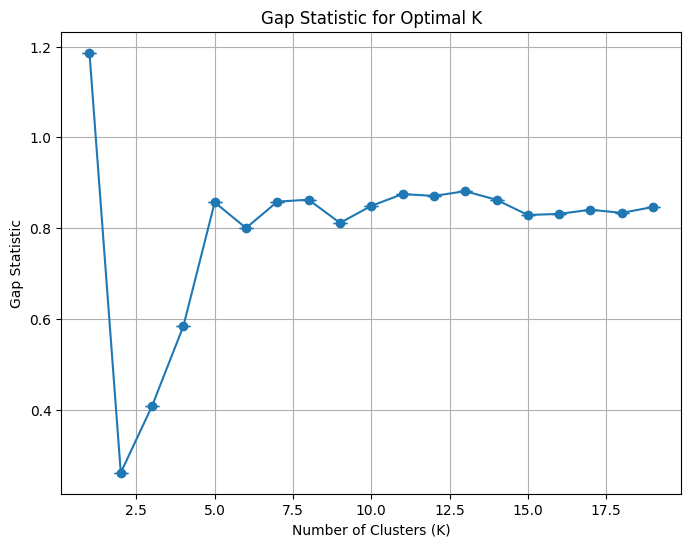

In [27]:
from sklearn.metrics import pairwise_distances_argmin_min

# Define the compute_wcss function to calculate Within-Cluster Sum of Squares (WCSS)
def compute_wcss(X, labels, K):
    """Compute Within-Cluster Sum of Squares (WCSS) for the given clusters."""
    wcss = np.sum([np.sum(np.square(pairwise_distances_argmin_min(X, X[labels == k])[1])) for k in range(K)])
    return wcss

# Define the gap_statistic function to calculate the Gap Statistic for a range of K values
def gap_statistic(X, K_values, n_refs=10):
    """Calculate the Gap Statistic for a range of K values."""
    gaps = []
    gaps_std = []
    
    # Generate reference data
    n_samples, n_features = X.shape
    reference_data = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=(n_samples, n_features))
    
    for K in K_values:
        # Compute WCSS for the actual data
        kmeans = KMeans(n_clusters=K, random_state=42)
        kmeans.fit(X)
        wcss_actual = compute_wcss(X, kmeans.labels_, K)
        
        # Compute WCSS for reference data
        wcss_refs = np.zeros(n_refs)
        for i in range(n_refs):
            kmeans_ref = KMeans(n_clusters=K, random_state=42)
            kmeans_ref.fit(reference_data)
            wcss_refs[i] = compute_wcss(reference_data, kmeans_ref.labels_, K)
        
        # Compute Gap statistic
        gap = np.mean(np.log(wcss_refs)) - np.log(wcss_actual)
        gap_std = np.std(np.log(wcss_refs)) / np.sqrt(n_refs)
        
        gaps.append(gap)
        gaps_std.append(gap_std)
    
    return np.array(gaps), np.array(gaps_std)

# Define K values and the data from the dataset
K_values = range(1, 20)
X = data[['V1', 'V2']].values

# Compute the Gap Statistic
gaps, gaps_std = gap_statistic(X, K_values)

# Plot the Gap Statistic
plt.figure(figsize=(8, 6))
plt.errorbar(K_values, gaps, yerr=gaps_std, fmt='-o', capsize=5)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal K')
plt.grid(True)
plt.show()


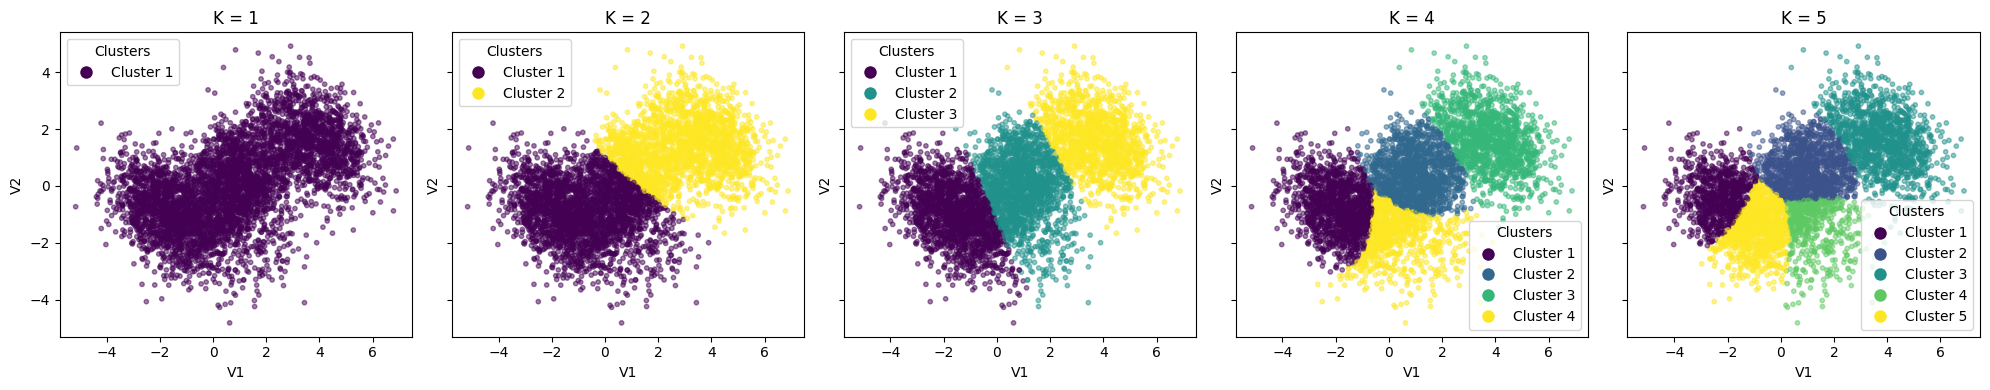

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Extract the 2D data (V1 and V2 columns) as a NumPy array
observations = data[['V1', 'V2']].values

# Define a range of K values
K_values = range(1, 6)

# Choose which dimensions to plot (e.g., dimensions 0 and 1, which correspond to V1 and V2)
dim1, dim2 = 0, 1

# Create subplots for each K value
fig, axs = plt.subplots(1, len(K_values), figsize=(20, 4), sharey=True)

# Perform GMM clustering for each K and plot
for idx, K in enumerate(K_values):
    gmm = GaussianMixture(n_components=K, random_state=42)
    labels = gmm.fit_predict(observations)  # Predict cluster labels for the original data
    
    ax = axs[idx]
    scatter = ax.scatter(observations[:, dim1], observations[:, dim2], c=labels, cmap='viridis', marker='o', alpha=0.5, s=10)
    ax.set_title(f'K = {K}')
    ax.set_xlabel('V1')
    ax.set_ylabel('V2')
    
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(K)]
    ax.legend(handles, [f'Cluster {i+1}' for i in range(K)], title="Clusters")

plt.tight_layout()
plt.show()


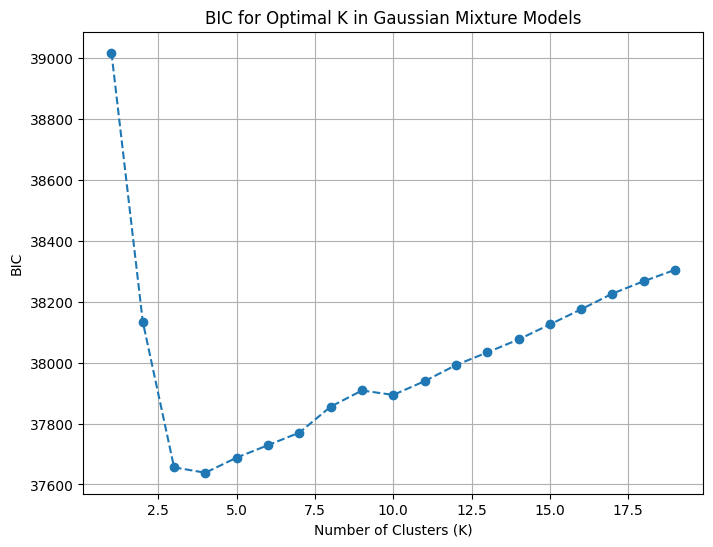

The optimal number of clusters based on BIC is: 4


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming 'observations' contains the 100 observations (3-dimensional data points)

# Define a range of K values
K_values = range(1, 20)

# List to store BIC values for each K
bic_values = []

# Fit GMM and compute BIC for each K
for K in K_values:
    gmm = GaussianMixture(n_components=K, random_state=42)
    gmm.fit(observations)
    bic_values.append(gmm.bic(observations))

# Plot BIC values
plt.figure(figsize=(8, 6))
plt.plot(K_values, bic_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC')
plt.title('BIC for Optimal K in Gaussian Mixture Models')
plt.grid(True)
plt.show()

# Print the optimal K value
optimal_K = K_values[np.argmin(bic_values)]
print(f'The optimal number of clusters based on BIC is: {optimal_K}')
